In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

In [49]:
df = pd.read_csv('/content/insurance.csv')

In [50]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
347,46,male,33.345,1,no,northeast,8334.45755
1215,18,male,39.140,0,no,northeast,12890.05765
359,18,female,20.790,0,no,southeast,1607.51010
693,24,male,23.655,0,no,northwest,2352.96845
1119,30,female,19.950,3,no,northwest,5693.43050


In [51]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [53]:
df.shape

(1338, 7)

In [54]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [55]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


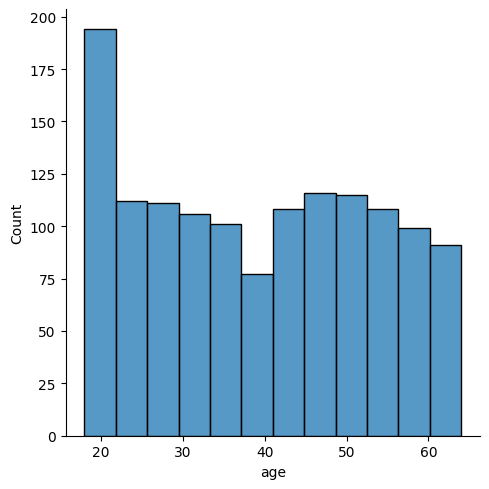

In [56]:
sns.displot(df['age'])

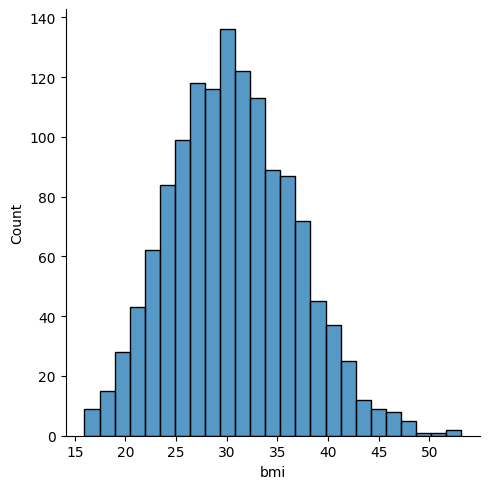

In [57]:
sns.displot(df['bmi'])

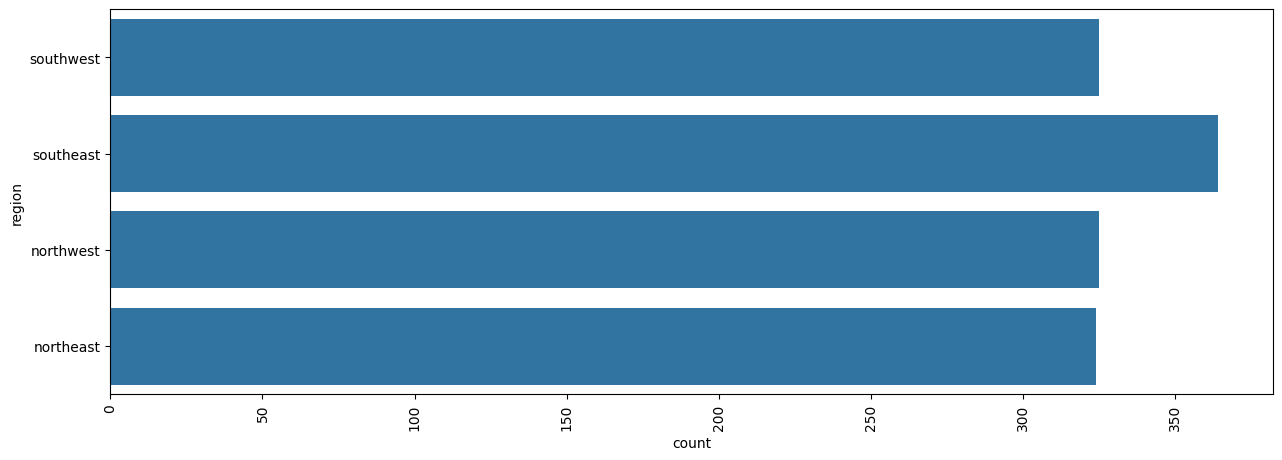

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(df['region'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='children'>

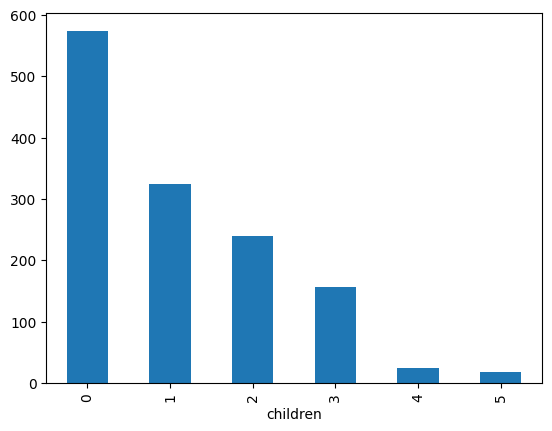

In [59]:
df['children'].value_counts().plot(kind='bar')

<Axes: >

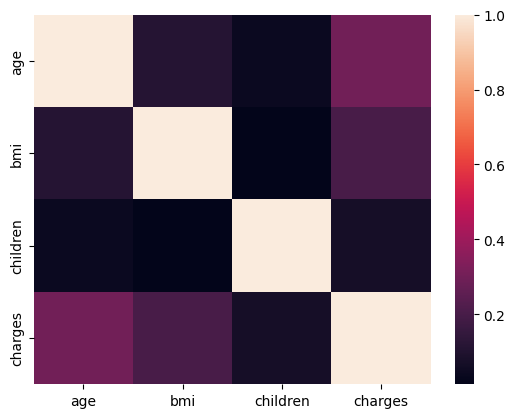

In [60]:
sns.heatmap(df.corr(numeric_only=True))

In [61]:
pd.crosstab(df['sex'],df['children'])

children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


In [62]:
def weight_category(bmi):
  if bmi < 18.5:
    return 'Underweight'
  elif bmi >=18.5 and bmi < 25:
    return 'Normal'
  elif bmi >= 25 and bmi < 30:
    return 'Overweight'
  else:
    return 'Obese'

In [63]:
df['bmi_category'] = df['bmi'].apply(weight_category)

In [64]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
 7   bmi_category  1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [66]:
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region', 'bmi_category']

preprocessor = ColumnTransformer(
    transformers=[
        ('encode', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', "passthrough", numerical_features)
    ]
)


In [67]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [68]:
df['bmi_category'].unique()

array(['Overweight', 'Obese', 'Normal', 'Underweight'], dtype=object)

In [69]:
X = df.drop(columns=['charges'])
y = df['charges']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
from sklearn.pipeline import Pipeline

In [72]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=300))
])

In [73]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'region',
                                                   'bmi_category']),
                                                 ('num', 'passthrough',
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('regressor', RandomForestRegressor(n_estimators=300))])

In [74]:
y_pred = pipeline.predict(X_test)

In [75]:
r2_score(y_test, y_pred)

0.8629814529948086

In [76]:
import pickle
pickle.dump(pipeline, open('pipeline.pkl','wb'))

In [77]:
result = pipeline.predict(pd.DataFrame([{
    'age': 19,
    'sex': 'male',
    'bmi': 27.9,
    'children': 0,
    'smoker': 'yes',
    'region': 'southwest',
    'bmi_category': 'Normal'
} ]))

In [78]:
print(result)

[17239.8888969]
